# SuperStore Sales Datacleaning
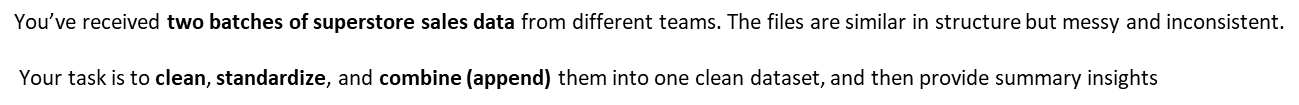

In [2]:
import pandas as pd

## Import Data

In [3]:
# Imported the two datasets from Excel
df1 = pd.read_excel(r"C:\Users\cw_86\Downloads\Week 2 Data Challenge.xlsx", sheet_name = 'Batch 1')
df2 = pd.read_excel(r"C:\Users\cw_86\Downloads\Week 2 Data Challenge.xlsx", sheet_name = 'Batch 2')

> **Batch 1 Dataset**

In [4]:
df1

,Order ID,Customer Info,Order Date,Ship Mode,State,Product Name,Category,Sales,Quantity
0,ORD-1000,Ahmed Musa | CUST-0032,invalid date,NaN,California,Office Chair,NaN,$300,NaN
1,ORD-1001,Fatima Bello | CUST-0416,2021-05-03 00:00:00,Standard Class,California,Desk,NaN,49.99,1
2,ORD-1002,Emily Davis | CUST-0886,2021-10-10 00:00:00,First Class,calif.,Wireless Mouse,NaN,NaN,NaN
3,ORD-1003,John Smith | CUST-0816,2021-05-09 00:00:00,Second Class,NaN,Desk,Office supply,89.00,NaN
4,ORD-1004,Ahmed Musa | CUST-1446,2021-05-09 00:00:00,Second Class,Illinois,Monitor,NaN,NaN,five
...,...,...,...,...,...,...,...,...,...
3494,ORD-4494,Xiao Mei | CUST-1084,2021-03-21 00:00:00,Second Class,Texas,Pen Set,Technology,89.00,five
3495,ORD-4495,Ahmed Musa | CUST-1009,2021-08-03 00:00:00,NaN,calif.,Office Chair,NaN,49.99,NaN
3496,ORD-4496,Fatima Bello | CUST-1195,2021-04-30 00:00:00,Standard Class,NaN,Desk,Office Supplies,"125,00",NaN
3497,ORD-4497,Fatima Bello | CUST-1274,invalid date,First Class,Texas,Office Chair,NaN,49.99,NaN


> **Batch 2 Dataset**

In [5]:
df2

,Order ID,Customer Info,Order Date,Ship Mode,State,Product Name,Category,Sales,Quantity
0,ORD-4499,Carlos O'Neil | CUST-0860,2021-01-04 00:00:00,Same Day,calif.,Notebook,Technology,NaN,1
1,ORD-4500,Ahmed Musa | CUST-0836,2021-06-02 00:00:00,Standard Class,Florida,Desk,Technology,49.99,4
2,ORD-4501,Fatima Bello | CUST-1407,2021-05-05 00:00:00,Second Class,Texas,Desk,Office supply,NaN,NaN
3,ORD-4502,Ahmed Musa | CUST-1341,2021-06-03 00:00:00,standard class,NaN,Desk,Technology,$300,4
4,ORD-4503,Fatima Bello | CUST-0047,2021-01-29 00:00:00,NaN,Texas,Pen Set,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3496,ORD-7995,Ahmed Musa | CUST-1221,2021-09-17 00:00:00,Standard Class,Texas,Notebook,NaN,NaN,NaN
3497,ORD-7996,Xiao Mei | CUST-0226,2021-09-05 00:00:00,First Class,Texas,Pen Set,Office Supplies,"125,00",3
3498,ORD-7997,Carlos O'Neil | CUST-0856,2021-01-25 00:00:00,NaN,Illinois,Office Chair,Furn,$300,NaN
3499,ORD-7998,John Smith | CUST-0441,2021-09-12 00:00:00,Second Class,Texas,Pen Set,Office supply,89.00,4


# Data Cleaning

In [6]:
# Appended the two Datasets as combined_data
combined_data = pd.concat([df1,df2])

# Reset index to append the two dataset index as one
combined_data.reset_index(drop = True, inplace = True)

In [7]:
# Splitted the Customer Info column into two separate columns (Customer Name and CustomerID)
combined_data[['Customer Name', 'CustomerID']] = combined_data['Customer Info'].str.split('|', expand = True)

In [8]:
# Deleted the Customer Info column
combined_data = combined_data.drop(columns = 'Customer Info')

# Moved Customer Name and CustomerID columns to 2nd and 3rd position
combined_data = combined_data.iloc[:, [0,8,9,1,2,3,4,5,6,7]]

In [9]:
# Converted all values in `Order Date` to proper Date format and fill the missing date with the default date `2021-01-01
combined_data['Order Date'] = pd.to_datetime (combined_data['Order Date'], errors = 'coerce').fillna('2021-01-01')

C:\Users\cw_86\AppData\Local\Temp\ipykernel_1376\2061998102.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_data['Order Date'] = pd.to_datetime (combined_data['Order Date'], errors = 'coerce').fillna('2021-01-01')


In [10]:
# Filled missing rows in Ship Mode and State with unkown
combined_data[['Ship Mode','State']] = combined_data[['Ship Mode', 'State']].fillna('Unkown')

# Standardized the Ship Mode column
combined_data['Ship Mode'] = combined_data['Ship Mode'].str.title()

In [11]:
# Cleaned the `State` column  to fix variations as follows
# calif. → California
# NY → New York
# TX → Texas 
combined_data['State'] = combined_data['State'].replace(['calif.', 'NY','TX'], ['California', 'New York', 'Texas'])

In [12]:
# Normalize values to: Technology, Furniture, Office Supplies
# Used logical rules to assign consistent category to each product
for x in combined_data.index:
    if combined_data.loc[x, 'Product Name'] in ('Office Chair', 'Desk'):
        combined_data.loc[x, 'Category'] = 'Furniture'
    elif combined_data.loc[x, 'Product Name'] in ('Monitor', 'Wireless Mouse', 'Laptop'):
        combined_data.loc[x, 'Category'] = 'Technology'
    else:
        combined_data.loc[x, 'Category'] = 'Office supplies'

In [13]:
# Filled missing rows in Sales and Quantity column with 0
combined_data[['Sales', 'Quantity']] = combined_data[['Sales', 'Quantity']].fillna(0)

# Removed currency sign, comma and text values from Sales column
combined_data['Sales'] = combined_data['Sales'].replace(['$300','125,00'],['300.00', '125.00']).astype(float)

In [14]:
# Replaced five with 5 and convert the quantity column to number
combined_data['Quantity'] = combined_data['Quantity'].replace('five', 5).astype(int)

## Result

In [21]:
combined_data

,Order ID,Customer Name,CustomerID,Order Date,Ship Mode,State,Product Name,Category,Sales,Quantity
0,ORD-1000,Ahmed Musa,CUST-0032,2021-01-01,Unkown,California,Office Chair,Furniture,300.00,0
1,ORD-1001,Fatima Bello,CUST-0416,2021-05-03,Standard Class,California,Desk,Furniture,49.99,1
2,ORD-1002,Emily Davis,CUST-0886,2021-10-10,First Class,California,Wireless Mouse,Technology,0.00,0
3,ORD-1003,John Smith,CUST-0816,2021-05-09,Second Class,Unkown,Desk,Furniture,89.00,0
4,ORD-1004,Ahmed Musa,CUST-1446,2021-05-09,Second Class,Illinois,Monitor,Technology,0.00,5
...,...,...,...,...,...,...,...,...,...,...
6995,ORD-7995,Ahmed Musa,CUST-1221,2021-09-17,Standard Class,Texas,Notebook,Office supplies,0.00,0
6996,ORD-7996,Xiao Mei,CUST-0226,2021-09-05,First Class,Texas,Pen Set,Office supplies,125.00,3
6997,ORD-7997,Carlos O'Neil,CUST-0856,2021-01-25,Unkown,Illinois,Office Chair,Furniture,300.00,0
6998,ORD-7998,John Smith,CUST-0441,2021-09-12,Second Class,Texas,Pen Set,Office supplies,89.00,4


## Conclusion

In [16]:
# What is the Total Sales Value? 
total_sales_value = combined_data['Sales'].sum()

total_sales_value

558071.45

In [17]:
# How many customers used the Standard Class ship mode? 
standard_class_count = (combined_data['Ship Mode'] == 'Standard Class').sum()

standard_class_count

2012

In [18]:
# How many unique customers are in the dataset?
no_of_unique_customers = combined_data['Customer Name'].nunique()

no_of_unique_customers

6